# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Descriptive Statistics Assignment </span> </div>

###### Note: 
<div class="alert alert-block alert-danger"> <span style="font-family: Times New Roman"> 
    - Kindly use this notebook to solve the programming problems. <br>
    - Submit assignments with .ipynb file extension.<br>
- Kindly write down the explanations/insights for the graphs.<br>
- Kindly use comments or markdowns to explain logic behind the codes, approach to solve the problem.</span></div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
<b>The below-given data is of two batsmen from which the captain has to select one batsman. As a captain, I need a batsman whose performance is stable in England. A test series is happening in England during winter. Use Descriptive statistics to select one batsman who can probably perform better than the other. Please give proper reasoning behind your selection, like why you have chosen the particular batsman supported by statistic outputs. You have to show your numerical findings with the help of Python code, and a theoretical interpretation also is given to support your conclusion. 
    </b></p>
    
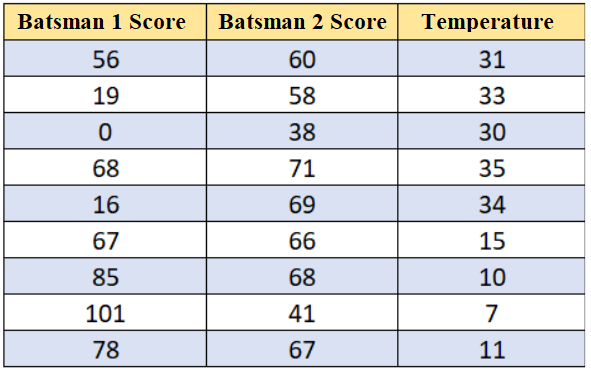

</span>
</div>



##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [236]:
# importing the usefull libraries
import numpy as np                                  # to create arrays
import pandas as pd                                 # to create dataframe and series
import scipy                                        # to use statistical functions
from scipy import stats                             # to use Statistical Tests
import seaborn as sns                               # using graphs and charts

##  <mark><span  style= "font-family: Times New Roman">View the data</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [237]:
# Create a dataframe using given data
cricket = {'Batsman 1 score': pd.Series([56,19,0,68,16,67,85,101,78]),
         'Batsman 2 score': pd.Series([60,58,38,71,69,66,68,41,67]),
         'Temperature': pd.Series([31,33,30,35,34,15,10,7,11])}
cricket_team = pd.DataFrame(cricket)
cricket_team     # Print the Dataframe

,Batsman 1 score,Batsman 2 score,Temperature
0,56,60,31
1,19,58,33
2,0,38,30
3,68,71,35
4,16,69,34
5,67,66,15
6,85,68,10
7,101,41,7
8,78,67,11



##  <mark><span  style= "font-family: Times New Roman">Data preprocessing</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
</p><br>
   
  1. Third match score of Batsman-1 was mistakenly noted as 0. Kindly replace the value with the mean of earlier matches as it is not known.Round the calculated mean to the nearest integer. <br>    

2. Create a new feature in the dataframe naming 'weather' <br>
    
   a. Column should have 'Warm' if the temperature on the match day is greater than the mean of the temperatures.  <br>
   b. Column should have 'Cool' if the temperature on the match day is lesser than the mean of the temperatures.  <br>
</span>
</div>


In [238]:
# 1.Replace the third match index of Batsman 1 score
third_match_index = 2
earlier_match_score = cricket_team.loc[:third_match_index - 1, 'Batsman 1 score']

# Calculate the rounded mean to the nearest integer
mean_score = round(earlier_match_score.mean())

# Replace the 3rd index of Batsman 1 score
cricket_team.at[third_match_index,'Batsman 1 score'] = mean_score


# 2.Create a new column 'weather'
# Calculate the mean of Temperature
mean_temperature = cricket_team['Temperature'].mean()     # when calculating mean of temperature is 22.89

# create a 'weather' column in the dataframe
def weather(Temperature) :
    if Temperature > mean_temperature:           # used if else statement to identify the  temperature is 'warm' or 'cool'
        return 'Warm'
    else :
        return 'Cool'
cricket_team['weather'] = cricket_team['Temperature'].apply(weather)
cricket_team

,Batsman 1 score,Batsman 2 score,Temperature,weather
0,56,60,31,Warm
1,19,58,33,Warm
2,38,38,30,Warm
3,68,71,35,Warm
4,16,69,34,Warm
5,67,66,15,Cool
6,85,68,10,Cool
7,101,41,7,Cool
8,78,67,11,Cool


##  <mark><span  style= "font-family: Times New Roman">Perform EDA</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

### Visualize the evidences 

In [239]:
# Check the shape of the data
cricket_team.shape            # Here 9 rows and 4 columns

(9, 4)

In [240]:
# Check the descrete Values using discribe function
cricket_team.describe()

,Batsman 1 score,Batsman 2 score,Temperature
count,9.000000,9.000000,9.000000
mean,58.666667,59.777778,22.888889
std,29.248932,12.245180,11.783934
min,16.000000,38.000000,7.000000
25%,38.000000,58.000000,11.000000
50%,67.000000,66.000000,30.000000
75%,78.000000,68.000000,33.000000
max,101.000000,71.000000,35.000000


### Data cleaning 

In [241]:
# check the columns all are correct name or not
cricket_team.columns

Index(['Batsman 1 score', 'Batsman 2 score', 'Temperature', 'weather'], dtype='object')

In [242]:
# check the unique values
cricket_team['weather'].unique()   # if we want to get unique values for a perticular column
cricket_team.nunique()

Batsman 1 score    9
Batsman 2 score    9
Temperature        9
weather            2
dtype: int64

In [243]:
# check the null values
cricket_team.isnull().sum()

Batsman 1 score    0
Batsman 2 score    0
Temperature        0
weather            0
dtype: int64

Here no null values. if any null values is there we have to calculate using categorial functions based on the scinario of the data and apply the values. To get the 0 null values

In [244]:
# Remove unneccesary column
team = cricket_team.drop(['Temperature','weather'], axis = 1)
team

,Batsman 1 score,Batsman 2 score
0,56,60
1,19,58
2,38,38
3,68,71
4,16,69
5,67,66
6,85,68
7,101,41
8,78,67


### Data Visualization

In [245]:
# check the correlation 
corelation = cricket_team.corr()

C:\Users\daksh\AppData\Local\Temp\ipykernel_5764\1401295983.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

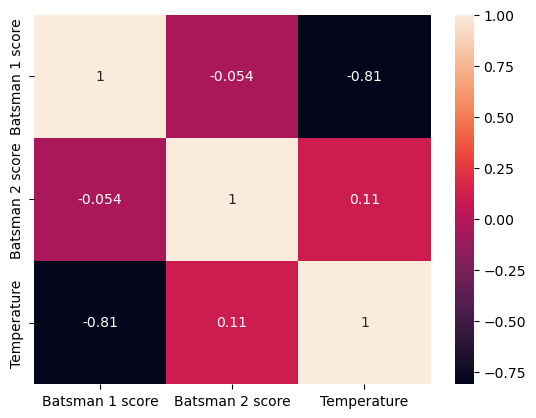

In [246]:
# create a heat map
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

Here Batsman 1 score and Batsman 2 score is heated at -0.054 value

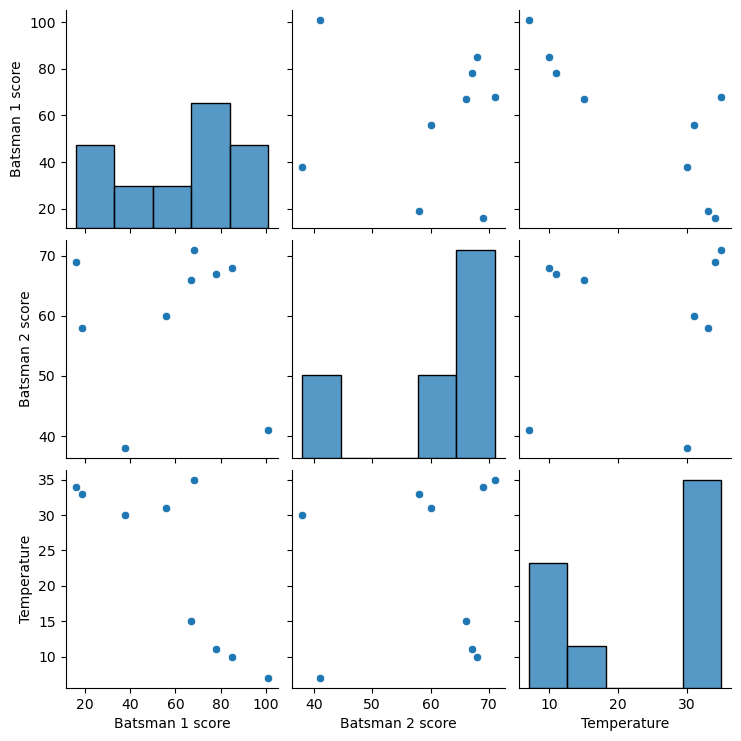

In [247]:
# easy to analyse the data using pairplot
sns.pairplot(cricket_team)

Here Batsman 1 sciore is good upto 70. aftert that score is dicreasing to 40.and Batsman 2 score is randomly increasing the value upto 70

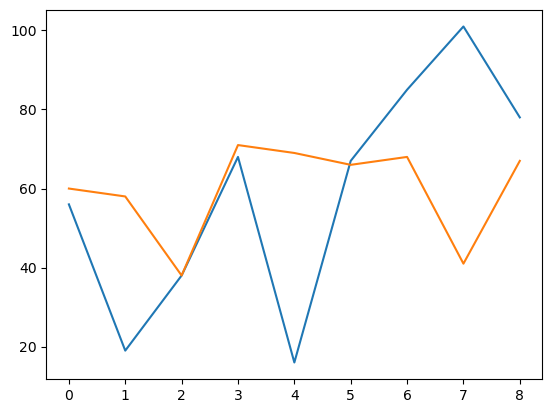

In [248]:
# create line chart
from matplotlib import pyplot as plt
plt.plot(team)

<Figure size 400x400 with 0 Axes>

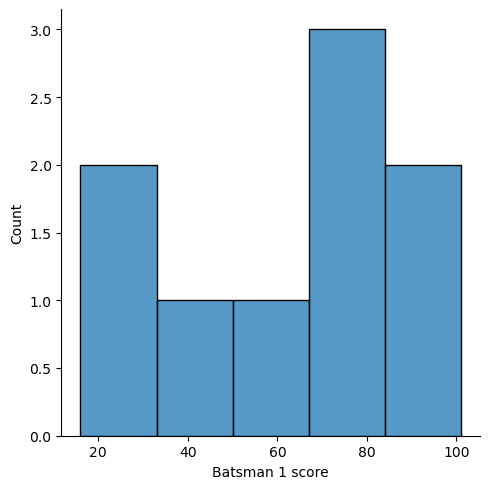

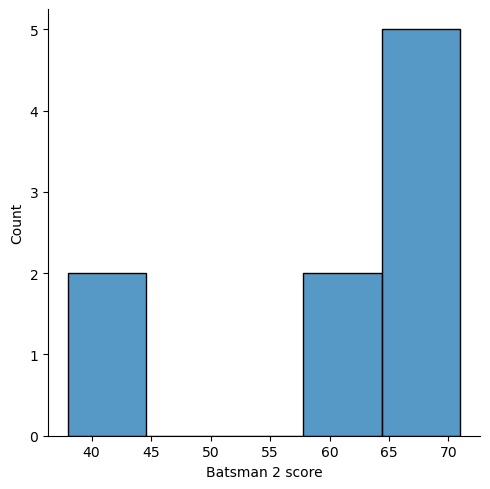

In [249]:
# create histogram
plt.figure(figsize=(4,4))
sns.displot(team['Batsman 1 score'], bins = 5)
sns.displot(team['Batsman 2 score'], bins = 5)

<Axes: >

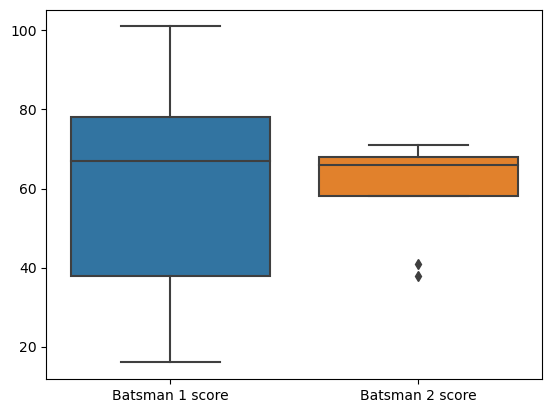

In [250]:
# create a categorical plot (Box plot)
sns.boxplot(team)

In [251]:
# Descriptive statistics for both batsmen scores
cricket_team.describe()

,Batsman 1 score,Batsman 2 score,Temperature
count,9.000000,9.000000,9.000000
mean,58.666667,59.777778,22.888889
std,29.248932,12.245180,11.783934
min,16.000000,38.000000,7.000000
25%,38.000000,58.000000,11.000000
50%,67.000000,66.000000,30.000000
75%,78.000000,68.000000,33.000000
max,101.000000,71.000000,35.000000


##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

Considering the captain's requirement for a stable performance, Batsman 2 appears to be more consistent in England during winter based on the lower standard deviation. While Batsman 1 has a higher average score, the lower variability in scores for Batsman 2 makes them a more stable choice for the captain's selection.

- Heat map showing the results as hightly effective when relationship between Batsman 1 and temparature comparing to relation between Batsman 2.
- Histogram is better way to understanding the analysis of data. Here, Batsman 1 score is increasing at 70 then come down at 40.It showing bell shaped curve.we can identify the mean value.Batsman 2 score is continuously increasing at 70.It showing positive curve. coming to temperature level is very hight at approximatly 35.
- In line chart is showing batsman 1 score is more dominant to Batsman 2 score. But Batsman 2 score was stable.
- In bar graphs showing the 2 outliers in Batsman 2 score. The both Batsman score mean is similar but slite difference.
- Finally the Batsman 2 Standard deviation lower than the Batsman 1.comparing the minimin, maximum score of both Batsmen. Batsman 2 is more preferreble captain for the England.

## Thank you !!!